In [1]:
import multiprocessing as mp
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import mabs

sns.set_theme()

n = 1000
mus = np.linspace(0, 1, 100)

In [20]:
def experiment(mu, n, envx):
    exp_regret = np.empty(1000)
    for i in range(1000):
        arms = [
            mabs.arms.NormalArm(0, 1),
            mabs.arms.NormalArm(mu, 1),
        ]
        env = envx(n)
        env.arms = arms

        for _ in range(n):
            env.act()
        exp_regret[i] = env.regret

    return exp_regret, mu, n, envx.__name__

In [21]:
regrets = []
args = []

for env in [mabs.envs.ucb.AsymptoticUCB, mabs.envs.ucb.MossUCB, mabs.envs.ucb.UCB]:
    args += [(mu, n, env) for mu in mus]
with mp.Pool(32) as p:
    result = p.starmap(experiment, args)

with open("result.pkl", "wb") as f:
    pickle.dump(result, f)

In [22]:
with open("result.pkl", "rb") as f:
    result_raw = pickle.load(f)

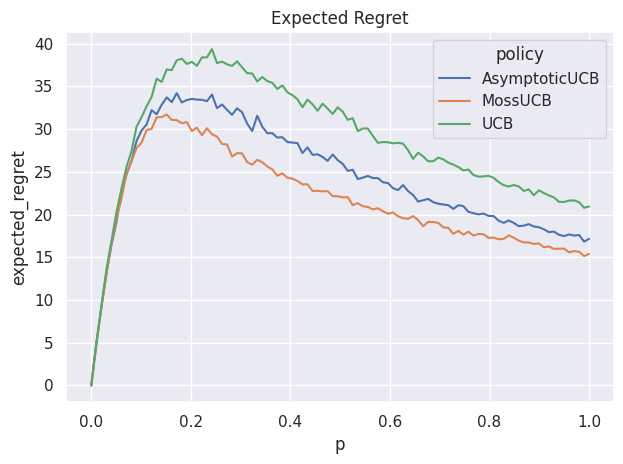

In [25]:
mean_regret = [(regret.mean(), mu, n, policy) for regret, mu, n, policy in result_raw]
mean_regret_df = pd.DataFrame(mean_regret, columns=["expected_regret", "p", "n", 'policy'])
sns.lineplot(data=mean_regret_df, x="p", y="expected_regret", hue='policy')
plt.title("Expected Regret")
plt.tight_layout()
plt.savefig("ucb_normal_mean.pdf")

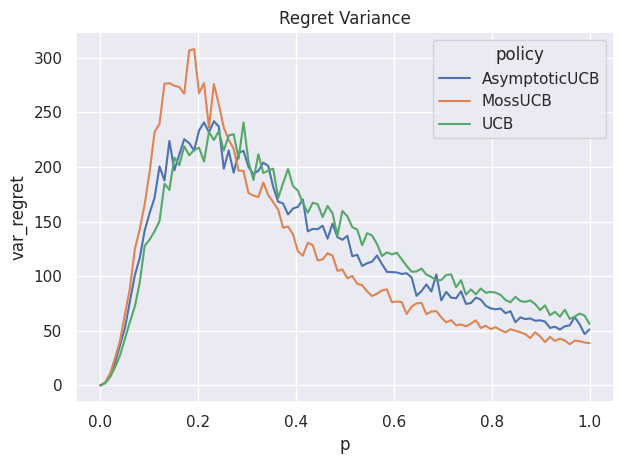

In [26]:
var_regret = [(regret.var(), mu, n, policy) for regret, mu, n, policy in result_raw]
var_regret_df = pd.DataFrame(var_regret, columns=["var_regret", "p", "n", 'policy'])
sns.lineplot(data=var_regret_df, x="p", y="var_regret", hue='policy')
plt.title("Regret Variance")
plt.tight_layout()
plt.savefig("ucb_normal_var.pdf")